# Time Series Temperature Forcasting

### Import Dependencies

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

### Data Collection and Processing

In [2]:
# load dataset
climate_data = pd.read_csv("../../data/jena_climate_2009_2016.csv")

you can get this data from "https://www.kaggle.com/datasets/pankrzysiu/weather-archive-jena"

In [3]:
# show dataset
climate_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
# dataset dimension
climate_data.shape

(420551, 15)

In [5]:
# Takuing each hour data only 
climate_data = climate_data[5::6]
climate_data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [6]:
# change the index columns to plot with datetime
climate_data.index = pd.to_datetime(climate_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
climate_data[:24]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


### Data Visualization

Text(0.5, 1.0, 'Time Series Temperature Plot')

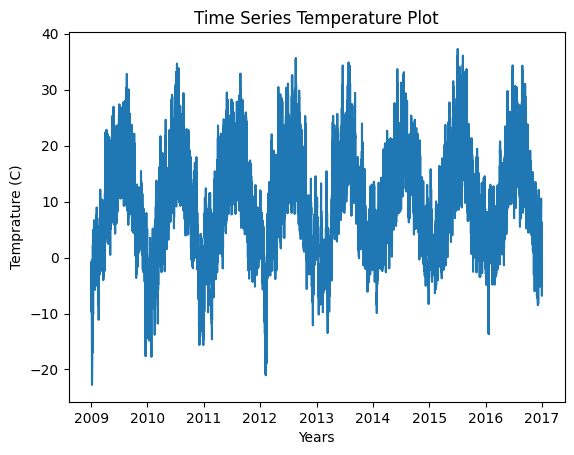

In [7]:
# Plot temperature
temperature = climate_data['T (degC)']
plt.plot(temperature)
plt.xlabel("Years")
plt.ylabel("Temprature (C)")
plt.title("Time Series Temperature Plot")

### Features and Target Selection

In [8]:
# function to make each 5 temp as features(X) and 6th one as target(Y)
# group every five hour as features(X) and next(6th) hour as label(Y)
# one step ahead(next row) maintaining widow size(5), exclude 1st feature
# include the preivous label into feature(X) and take next one as label(Y)
# repeat

def climate_data_to_X_Y(climate_data, window_size = 5):
    climate_data_as_np = climate_data.to_numpy()
    X = []
    Y = []
    for i in range(len(climate_data_as_np) - window_size):
        # take 5 columns as feature
        row = [[a] for a in climate_data_as_np[i:i+5]]
        X.append(row)
        # take next one(6th) as target 
        label = climate_data_as_np[i+5]
        Y.append(label)
    return np.array(X), np.array(Y)

In [9]:
# call above function to split features and targets
WINDOW_SIZE = 5
X, Y = climate_data_to_X_Y(temperature, WINDOW_SIZE)
X.shape, Y.shape

((70086, 5, 1), (70086,))

In [10]:
X, Y

(array([[[-8.05],
         [-8.88],
         [-8.81],
         [-9.05],
         [-9.63]],
 
        [[-8.88],
         [-8.81],
         [-9.05],
         [-9.63],
         [-9.67]],
 
        [[-8.81],
         [-9.05],
         [-9.63],
         [-9.67],
         [-9.17]],
 
        ...,
 
        [[ 2.44],
         [ 1.29],
         [-0.42],
         [-0.98],
         [-1.4 ]],
 
        [[ 1.29],
         [-0.42],
         [-0.98],
         [-1.4 ],
         [-2.75]],
 
        [[-0.42],
         [-0.98],
         [-1.4 ],
         [-2.75],
         [-2.89]]]),
 array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93]))

### Split Train, Validation & Test Data

In [11]:
# first 60000 as train data
X_train, Y_train = X[:60000], Y[:60000]
# next 5000 as validation data
X_val, Y_val = X[60000:65000], Y[60000:65000]
# remainng as test data
X_test, Y_test = X[65000:], Y[65000:]

In [12]:
print("Total data: ", X.shape, Y.shape)
print("Train data: ", X_train.shape, Y_train.shape)
print("Train data: ", X_val.shape, Y_val.shape)
print("Test data: ", X_test.shape, Y_test.shape)

Total data:  (70086, 5, 1) (70086,)
Train data:  (60000, 5, 1) (60000,)
Train data:  (5000, 5, 1) (5000,)
Test data:  (5086, 5, 1) (5086,)


### Build NN Network

In [13]:
# model building
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [14]:
# save model score function
cp = ModelCheckpoint('model/', save_best_only = True)
# compile model
model.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [15]:
# model training 
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10, callbacks = [cp])

Epoch 1/10


2024-02-28 18:21:07.208383: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - ETA: 0s - loss: 31.2438 - root_mean_squared_error: 5.5896

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 21s 11ms/step - loss: 31.2438 - root_mean_squared_error: 5.5896 - val_loss: 1.2405 - val_root_mean_squared_error: 1.1138
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 2.0868 - root_mean_squared_error: 1.4446

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 2.0839 - root_mean_squared_error: 1.4436 - val_loss: 0.6648 - val_root_mean_squared_error: 0.8154
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.9588 - root_mean_squared_error: 0.9792

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.9587 - root_mean_squared_error: 0.9791 - val_loss: 0.5380 - val_root_mean_squared_error: 0.7335
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7365 - root_mean_squared_error: 0.8582

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.7364 - root_mean_squared_error: 0.8582 - val_loss: 0.5207 - val_root_mean_squared_error: 0.7216
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6832 - root_mean_squared_error: 0.8266

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6835 - root_mean_squared_error: 0.8267 - val_loss: 0.5043 - val_root_mean_squared_error: 0.7101
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6679 - root_mean_squared_error: 0.8173

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6678 - root_mean_squared_error: 0.8172 - val_loss: 0.5002 - val_root_mean_squared_error: 0.7073
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6592 - root_mean_squared_error: 0.8119 - val_loss: 0.5017 - val_root_mean_squared_error: 0.7083
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6547 - root_mean_squared_error: 0.8092

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6546 - root_mean_squared_error: 0.8091 - val_loss: 0.4978 - val_root_mean_squared_error: 0.7055
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6510 - root_mean_squared_error: 0.8069 - val_loss: 0.5005 - val_root_mean_squared_error: 0.7075
Epoch 10/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6489 - root_mean_squared_error: 0.8056

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6488 - root_mean_squared_error: 0.8055 - val_loss: 0.4942 - val_root_mean_squared_error: 0.7030


### Model Evaluation

In [16]:
# load trained model
trained_model = load_model("model/") 

In [17]:
# prediction on train data
train_predictions = trained_model.predict(X_train).flatten()
train_results = pd.DataFrame(data = {"Train Predictions" :train_predictions, "Actual Values" :Y_train})
train_results

1875/1875 [==============================] - 5s 3ms/step


,Train Predictions,Actual Values
0,-9.777753,-9.67
1,-9.631508,-9.17
2,-8.827413,-8.10
3,-7.438041,-7.66
4,-7.231562,-7.04
...,...,...
59995,6.213738,6.07
59996,7.295711,9.88
59997,12.141558,13.53
59998,15.904802,15.43


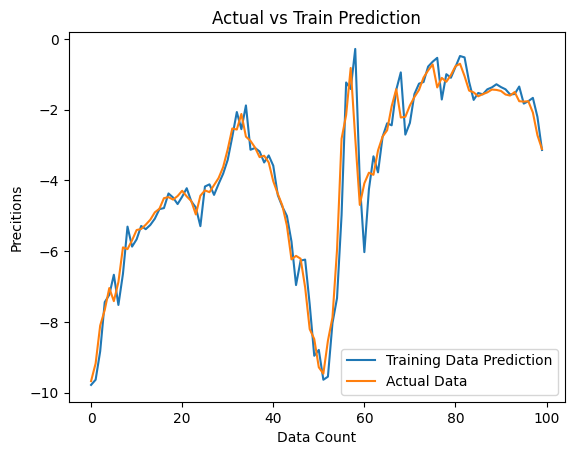

In [18]:
# Train and Prediction 
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actual Values'][:100])
plt.xlabel("Data Count")
plt.ylabel("Precitions")
plt.title("Actual vs Train Prediction")
plt.legend(["Training Data Prediction", "Actual Data"], loc = "lower right")
plt.show()

In [19]:
# prediction on validation data
val_predictions = trained_model.predict(X_val).flatten()
val_results = pd.DataFrame(data = {"Val Predictions" :val_predictions, "Actual Values" :Y_val})
val_results

157/157 [==============================] - 1s 3ms/step


,Val Predictions,Actual Values
0,15.472528,14.02
1,13.313462,13.67
2,13.154005,12.27
3,11.572901,11.19
4,10.442297,10.85
...,...,...
4995,17.461359,18.27
4996,17.531958,17.85
4997,17.254431,16.65
4998,15.939254,15.85


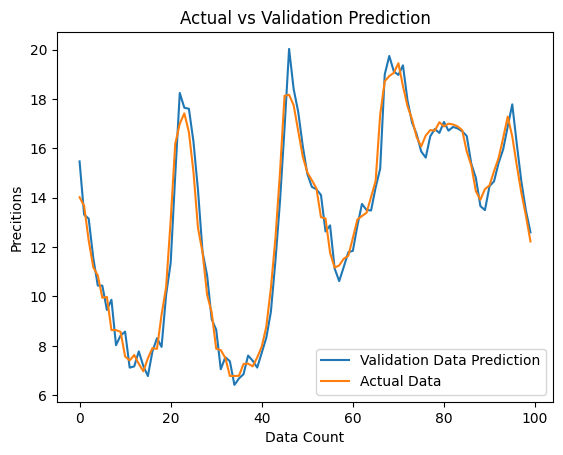

In [20]:
# Train and Prediction 
plt.plot(val_results["Val Predictions"][:100])
plt.plot(val_results["Actual Values"][:100])
plt.xlabel("Data Count")
plt.ylabel("Precitions")
plt.title("Actual vs Validation Prediction")
plt.legend(["Validation Data Prediction", "Actual Data"], loc = "lower right")
plt.show()

In [21]:
# prediction on test
test_predictions = trained_model.predict(X_test).flatten()
test_results = pd.DataFrame(data = {"Test Predictions" :test_predictions, "Actual Values" :Y_test})
test_results

159/159 [==============================] - 0s 3ms/step


,Test Predictions,Actual Values
0,14.494637,13.99
1,13.334126,13.46
2,12.954372,12.93
3,12.545857,12.43
4,12.093447,12.17
...,...,...
5081,-1.169305,-0.98
5082,-1.532062,-1.40
5083,-1.677117,-2.75
5084,-3.418576,-2.89


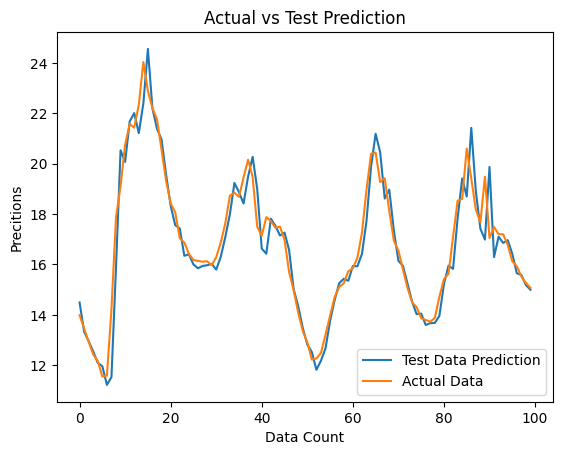

In [22]:
# Train and Prediction 
plt.plot(test_results["Test Predictions"][:100])
plt.plot(test_results["Actual Values"][:100])
plt.xlabel("Data Count")
plt.ylabel("Precitions")
plt.title("Actual vs Test Prediction")
plt.legend(["Test Data Prediction", "Actual Data"], loc = "lower right")
plt.show()